<a href="https://colab.research.google.com/github/spyrosviz/Sports_Event_Analysis/blob/main/Tennis/tennis_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nadal vs Djokovic in Open Final Australia 2019**

## **1. Plot court positions of both players on all winner strikes**

In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import plotly.express as px

In [ ]:
df_rallies = pd.read_csv(r'/content/drive/MyDrive/tennis_analysis/rallies.csv')
df_rallies.head()

,Unnamed: 0,rallyid,server,returner,winner,reason,serve,strokes,totaltime,x,y
0,0,1,Djokovic,Nadal,Djokovic,winner,first,3,0.92,1.92,21.96
1,1,2,Djokovic,Nadal,__undefined__,second_serve,first,1,0.00,7.42,12.10
2,2,3,Djokovic,Nadal,Djokovic,out,second,4,4.16,3.33,-0.39
3,3,4,Djokovic,Nadal,__undefined__,second_serve,first,1,0.00,4.64,17.69
4,4,5,Djokovic,Nadal,Djokovic,ace,second,2,0.40,1.62,17.18


## **The locations are based on the following graph dimensions (24,11.07), according to the dataset owner, who posted the dataset in kaggle.**


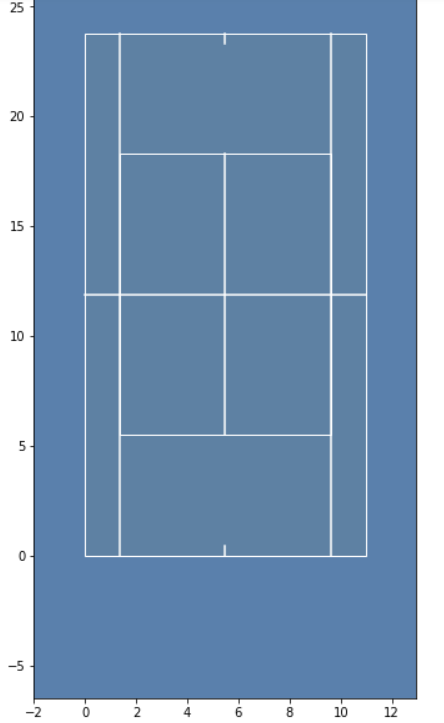

In [ ]:
from IPython.display import Image,display
display(Image('/content/drive/MyDrive/tennis_analysis/tennis_court_dimensions.png'))

##**Although exact dimensions are not given, we notice that the dimensions seem to match with original tennis court dimension in meters (23.77,10.97). However we want to plot the graph horizontally not vertically. Thus we are going to take the right lower court angle in the (0,0) position and then we are going to rotate it horizontally, and then (0,0) position will be on the lower left court angle, as we look it horizontally plotted. So the y axis becomes x axis and vice versa.**

In [ ]:
# Create plot court function with (0,0) position on the lower left court angle

def plot_tennis_court(ax,court_color='lightblue',lines_color='white'):
    # Set background color
    ax.set_facecolor(court_color)

    # Draw outer sidelines
    outer_court = patch.Rectangle([0,0],width=23.77,height=10.97,fill=False,color=lines_color)

    # Draw inner sidelines
    inner_court = patch.Rectangle([0,1.37],width=23.77,height=8.23,fill=False,color=lines_color)

    # Draw middle line
    middle_line = plt.plot([11.89,11.89],[0,10.97],c=lines_color,linestyle='dashed')

    # Draw left service lane
    plt.plot([5.94,5.94],[1.37,9.60],c=lines_color)

    # Draw right service lane
    plt.plot([17.83,17.83],[1.37,9.60],c=lines_color)

    # Draw center service line
    plt.plot([5.94,17.83],[5.48,5.48],c=lines_color)

    elements = [outer_court,inner_court]

    for element in elements:
        ax.add_patch(element)

    return ax

In [ ]:
# Swap x and y columns
df_rallies.rename(columns={'x':'y','y':'x'},inplace=True)
df_nadal_winners = df_rallies[(df_rallies['server']=='Nadal')&(df_rallies['reason']=='winner')].copy()
df_djokovic_winners = df_rallies[(df_rallies['server']=='Djokovic')&(df_rallies['reason']=='winner')].copy()
df_nadal = df_rallies[df_rallies['server']=='Nadal'].copy()
df_djokovic = df_rallies[df_rallies['server']=='Djokovic'].copy()
df_rallies.head()

,Unnamed: 0,rallyid,server,returner,winner,reason,serve,strokes,totaltime,y,x
0,0,1,Djokovic,Nadal,Djokovic,winner,first,3,0.92,1.92,21.96
1,1,2,Djokovic,Nadal,__undefined__,second_serve,first,1,0.00,7.42,12.10
2,2,3,Djokovic,Nadal,Djokovic,out,second,4,4.16,3.33,-0.39
3,3,4,Djokovic,Nadal,__undefined__,second_serve,first,1,0.00,4.64,17.69
4,4,5,Djokovic,Nadal,Djokovic,ace,second,2,0.40,1.62,17.18


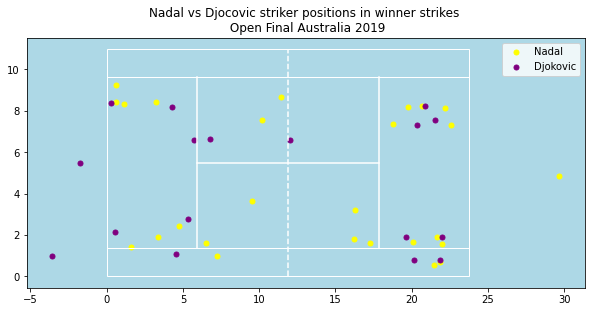

In [ ]:
fig, ax = plt.subplots(figsize=[10,4.6])
plot_tennis_court(ax)

ax.scatter(df_nadal_winners.x,df_nadal_winners.y,c='yellow',marker='.',s=100,label='Nadal')
ax.scatter(df_djokovic_winners.x,df_djokovic_winners.y,c='purple',marker='.',s=100,label='Djokovic')

ax.set_title('Nadal vs Djocovic striker positions in winner strikes \n Open Final Australia 2019')
ax.legend()

# Remove ticks
#plt.xticks([])
#plt.yticks([])

plt.show()

## **2. Select a specific rally to plot**

In [ ]:
df_events = pd.read_csv(r'/content/drive/MyDrive/tennis_analysis/events.csv')
df_events.rename(columns={'hitter_x':'hitter_y','hitter_y':'hitter_x','receiver_x':'receiver_y','receiver_y':'receiver_x'},inplace=True)
df_events.head()

,Unnamed: 0,rallyid,frameid,strokeid,hitter,receiver,isserve,serve,type,stroke,hitter_y,hitter_x,receiver_y,receiver_x,time
0,0,1,70877,1,Djokovic,Nadal,True,first,serve,forehand,6.50,-0.24,1.03,27.44,0.00
1,1,1,70900,2,Nadal,Djokovic,False,first,slice,backhand,0.05,25.59,6.17,1.11,0.92
2,2,1,70950,3,Djokovic,Nadal,False,first,topspin,forehand,1.42,2.33,4.75,26.45,2.92
3,3,2,71488,1,Djokovic,Nadal,True,first,serve,forehand,4.48,-0.01,7.90,26.83,24.44
4,4,3,71796,1,Djokovic,Nadal,True,second,serve,forehand,4.48,-0.37,7.88,26.47,36.76


In [ ]:
# Select rallyid
selected_rally = 11
df_rally = df_events[df_events['rallyid']==selected_rally].copy()
server = df_rally['hitter'].values[0]
winner = df_rally['hitter'].values[-1]
x_hit = df_rally['hitter_x'].values
y_hit = df_rally['hitter_y'].values
print(df_rally['rallyid'].unique())

[11]


In [ ]:
# Set axis limits
xmin = np.min(x_hit)
xmax = np.max(x_hit)
ymin = np.min(y_hit)
ymax = np.max(y_hit)

fig = px.scatter(df_rally, x="hitter_x", y="hitter_y", animation_frame="Unnamed: 0",
            color="hitter",range_x=[xmin-2,xmax+2],
            range_y=[ymin-2,ymax+2])
fig.update_layout(transition = {'duration': 3000})

## **In order to pretiffy the animation, a function will be defined which will plot the tennis court as well as the animation of the selected rally**

In [ ]:
import plotly.graph_objects as go

def animate_rally_tennis_court(x_loc,y_loc,court_color='lightblue',lines_color='white',lines_width=3,
                               scale=1,width_plot=1000,height_plot=461,ball_size=8,ball_color='navy'):
   
  '''
     The default coordinates I set in the function are in feet. To transform in meters, or yards change the scaling factor respectively.
     Set scaling factor = 0.3048 to transform court to meters.
     Set scaling factor = 0.3333 to transform court to yards
     '''

  # Set scaling factor for coordinates.
  scale = scale

  # Initiate figure and set frames
  fig = go.Figure(
    data=[go.Scatter(x=[x_loc[0]], y=[y_loc[0]],mode='markers',marker=dict(color=ball_color,size=ball_size))],

    layout=go.Layout(
        title=f"RallyId no {selected_rally} serving {server} and rally winnner is {winner}",
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None,{'frame':{'duration':800},'transition':{'duration':3000}}])])]
    ),

    frames=[go.Frame(data=[go.Scatter(x=[x_loc[i]], y=[y_loc[i]],mode='markers',marker=dict(color=ball_color, size=ball_size))]) for i in range(len(x_loc))]
  )

  # Set axes properties
  fig.update_xaxes(range=[-10 * scale, 88 * scale],showgrid=False)
  fig.update_yaxes(range=[-10 * scale, 46 * scale],showgrid=False)

  # Draw outer sidelines
  fig.add_shape(type="rect",
                xref="x", yref="y",
                x0=0 * scale, x1=78 * scale, y0=0 * scale, y1=36 * scale,line=dict(color=lines_color,width=lines_width),
                fillcolor=court_color,opacity=0.2)
  
  # Draw inner sidelines
  fig.add_shape(type="rect",
                xref="x", yref="y",
                x0=0 * scale, x1=78 * scale, y0=4.5 * scale, y1=31.5 * scale,line=dict(color=lines_color,width=lines_width))
  
  # Draw middle line
  fig.add_shape(type="line",
    x0=39 * scale, y0=0 * scale, x1=39 * scale, y1=36 * scale,line=dict(color=lines_color,width=lines_width,dash='dot'))
  
  # Draw left service lane
  fig.add_shape(type="line",
    x0=19.5 * scale, y0=4.5 * scale, x1=19.5 * scale, y1=31.5 * scale,line=dict(color=lines_color,width=lines_width))
  
  # Draw right service lane
  fig.add_shape(type="line",
    x0=58.5 * scale, y0=4.5 * scale, x1=58.5 * scale, y1=31.5 * scale,line=dict(color=lines_color,width=lines_width))
  
  # Draw center service line
  fig.add_shape(type="line",
    x0=19.5 * scale, y0=18 * scale, x1=58.5 * scale, y1=18 * scale,line=dict(color=lines_color,width=lines_width))
  
  fig.update_layout(width=width_plot, height = height_plot)
  
  return fig.show()

fig = animate_rally_tennis_court(x_loc=x_hit,y_loc=y_hit,scale=0.3048)